**Title: Bellabeat Case Study for Google Data Analytics Professional Certificate**

Author: Sujit Bhagwat

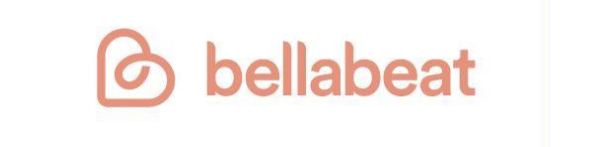

**About the company**

Bellabeat is a high-tech company founded in 2013. They create beautifully designed smart products that focus on women's health, collecting data on activity, sleep, stress, and reproductive health. Bellabeat rapidly expanded globally, offering a range of products through online retailers and their website. They heavily emphasize digital marketing, using platforms like Google Search, Facebook, Instagram, Twitter, YouTube, and the Google Display Network to connect with consumers.

**Business Task**

1) Analyze FitBit Fitness Tracker Data to uncover insights into consumer behavior and identify trends.

2) Apply these insights to understand the preferences and behaviors of Bellabeat customers.

3) Explain how these trends can inform Bellabeat's marketing strategy for a specific product.

**Data Source**

Fitbit public data useful for behavioral analysis and pattern recognition

This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

**Dataset Used**

We have exclusively chosen to work with daily data, omitting minute-by-minute detailed information. The following data file we have used:

dailyActivity_merged.csv



In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

Loading all data files 

In [2]:
DailyActivityDF = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")


Data cleaning and manipulation

In [3]:
DailyActivityDF.shape
DailyActivityDF.head(10)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


**Data Cleaning**

In [4]:
# Check for null values and count them
null_count = DailyActivityDF.isnull().sum()
null_count

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

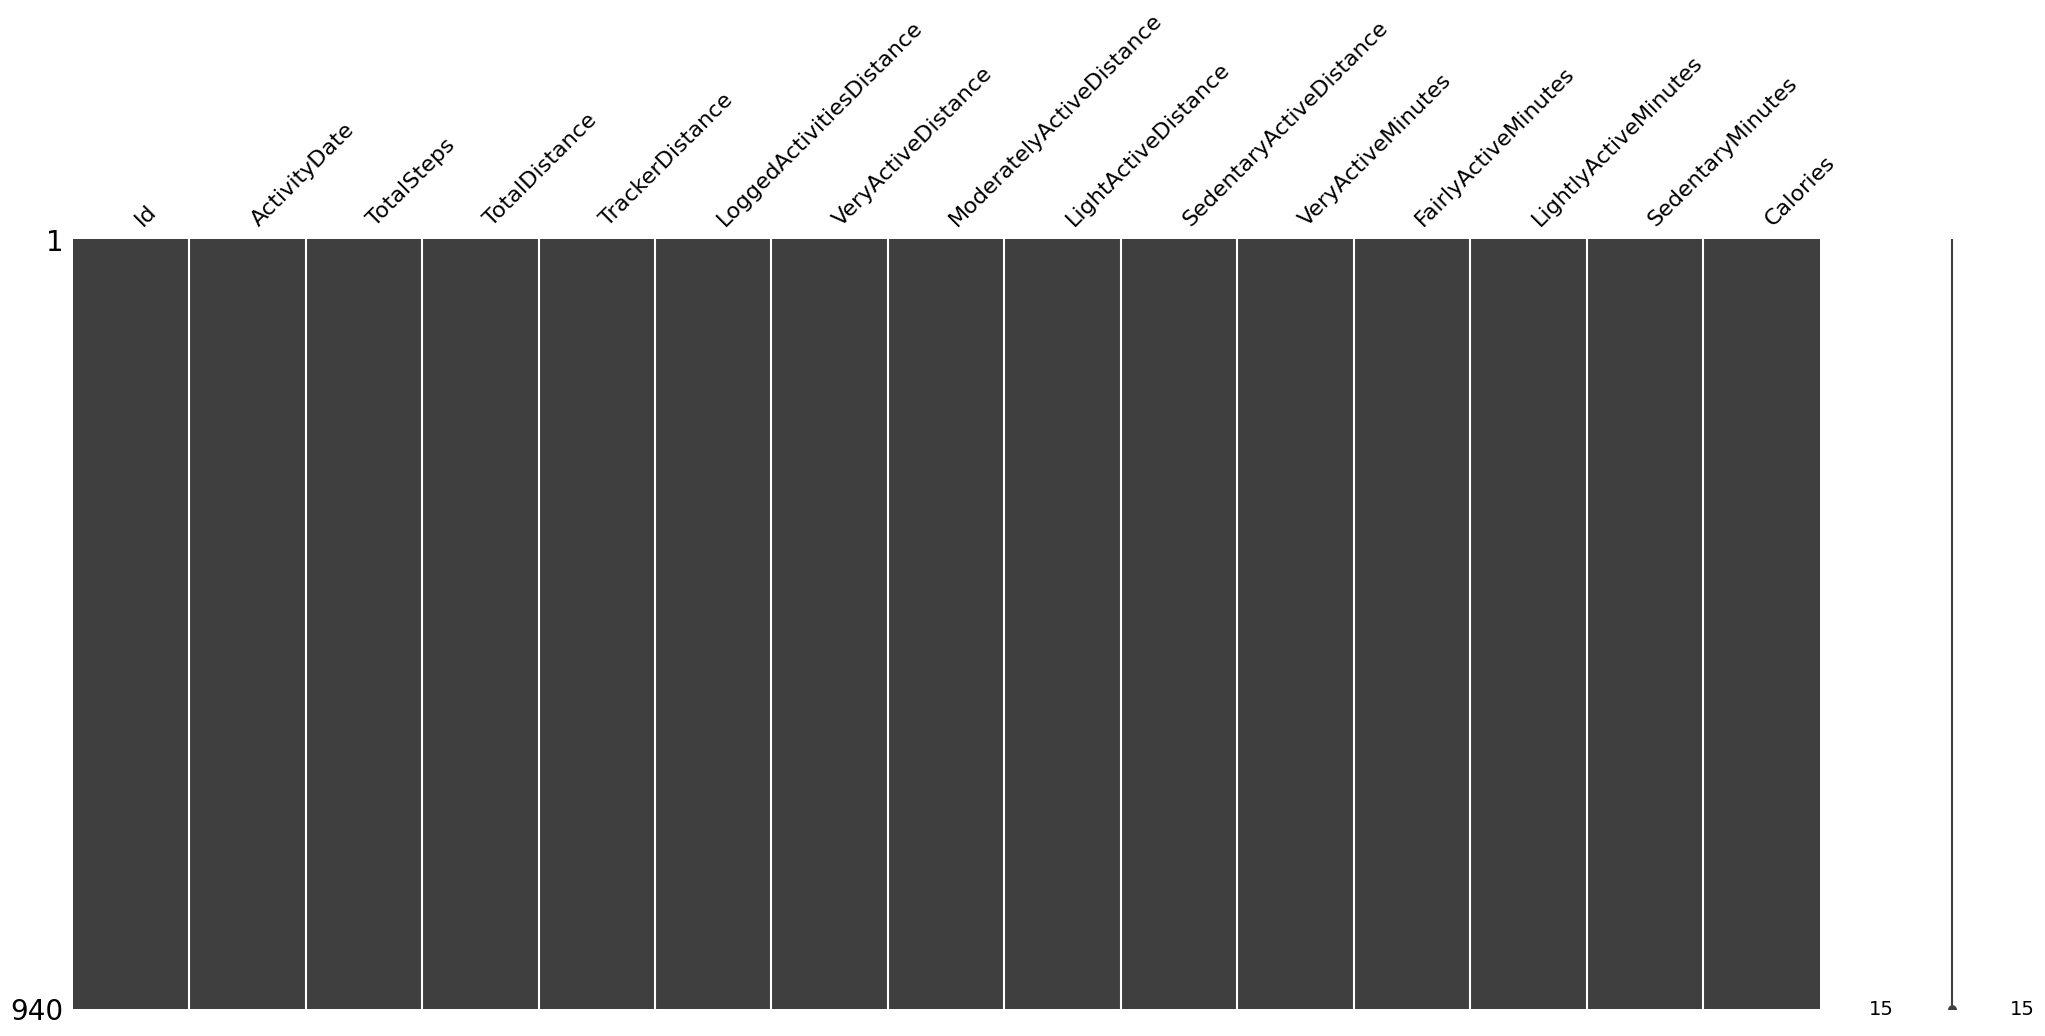

In [5]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(DailyActivityDF)  # Visualize missing values
plt.show()

In [6]:
df_description = DailyActivityDF.describe()
print(df_description)

                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                940.000000          940.000000                940.000000   
mean                   0.108171            1.502681                  0.567543   
std                    0.619897            2.658941                  0.883580   
min                    0.000000            0.000000   

In [7]:
DailyActivityDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [8]:
TotalUser = len(pd.unique(DailyActivityDF["Id"]))
  
print("TotalUser: " + str(TotalUser))

TotalUser: 33


In [9]:
sum_values = DailyActivityDF.groupby('Id')['ActivityDate'].count().reset_index()
sum_values = sum_values.sort_values(by='ActivityDate', ascending=True)
sum_values

,Id,ActivityDate
13,4057192912,4
8,2347167796,18
28,8253242879,19
10,3372868164,20
25,7007744171,26
23,6775888955,26
21,6117666160,28
31,8792009665,29
22,6290855005,29
2,1644430081,30


* There are 33 unique User in the dataset and not 30 as mentioned in database information .
* Three User IDs have less than 20 days of data 8253242879,2347167796,8253242879.
* We also noticed we dont have information about uniit or measurement for Distance used in this data.
* There are 940 records in the dataset.
* It seems that all columns have appropriate data types for their respective metrics, only ActivityDate   is not datatime type.
* The data ranges for each metric appear reasonable and within expected bounds.

In summary, this dataset appears to be clean, with no missing values and consistent data types.

**Feature Engineering / Data Transformation**

* First changed datya type of ActivityDate 
* Create new column Day Of The Week


In [10]:
# Changing "ActivityDate" column to datetime using pandas.to_datetime method

DailyActivityDF["ActivityDate"] = pd.to_datetime(DailyActivityDF["ActivityDate"], format="%m/%d/%Y")
